In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SubpopulationsLib.DataProcessing import create_SIR_data
from SubpopulationsLib.Subpopulations import \
    create_gaussian_dictionary, find_theta_dictionary

# Data loading
Load and visualize the number of people infected in Canada during a selected timeframe

In [2]:
# Determine the dates to use
start_date = '7/30/20'
end_date = '7/30/21'

# Set the path to the datasets
file_path = './Data/'
lookup_table_path = './Data/UID_ISO_FIPS_LookUp_Table.csv'

# Set the name of the country
country_name = 'Canada'

# Transform the data into SIR format
S, I, R = create_SIR_data(country_name, file_path, lookup_table_path, start_date, end_date)

indexes_weekly = np.arange(0,S.shape[0],7)

S = S[indexes_weekly]
I = I[indexes_weekly]
R = R[indexes_weekly]

data = I[1:]

### Visualize the data

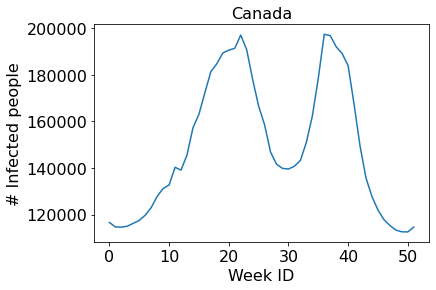

In [3]:
plt.figure()
plt.plot(data)
plt.xlabel("Week ID", fontsize=16)
plt.ylabel("# Infected people", fontsize=16)
plt.title(country_name, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Create a dictionary
A dictionary is a matrix of size (num_curves, num_timepoints) with all the available curves.
The entries of this dicionary can be manually created.

Here, we provide a method for creating a dictionary with Gaussian curves.

**create_gaussian_dictionary (T=52, mu_list=None, sigma_list=None, skewness_list=None)**

*Inputs*

- T : Number of time-points
- possible_mu : A list with all the means to be used
- possible_sigma: A list with all the stand deviations to be used
- possible_skewness: A list withh all the possible values for skewness

*Output*

- D_Gaussian: A matrix of size (num_curves, num_timepoints) with all the available curves created by the cross-product of the elements in possible_mu, possible_sigma and possible_skewness

In [4]:
T = 52
possible_mu = np.arange(0,52,2)
possible_sigma = np.arange(1,30,2)
possible_skewness = np.array([0])

D_Gaussian = create_gaussian_dictionary(
    T, possible_mu, possible_sigma, possible_skewness
)

### Visualize a few entries of the dictionary

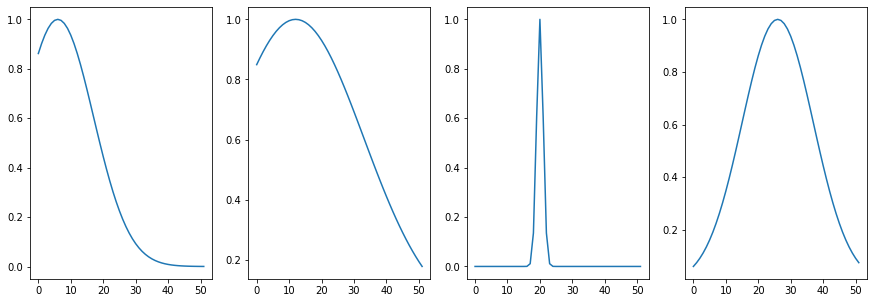

In [5]:
plt.figure(figsize=(15,5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.plot(D_Gaussian[(i+1)*50])

plt.show()

# Fit the weights of the dictionary

We provide a function for finding the coefficients of the curves in the dictionary

**find_theta_dictionary (D, x, lambda_reg=0, W=None)**

*Inputs*
- D : Dictionary. A numpy array of size (num_timeseries, length_time_series)
- x : signal to be modeled
- lamda_reg : regularization parameter
- W : Weights applied to each timepoint in x. Vector of length (length_timeseries)

*Output*
- theta : numpy array of length (num_timeseries) that minimize the 
		weighted, regularized mean squared error.

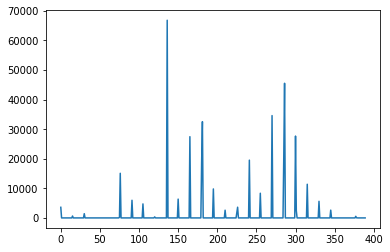

In [11]:
# Remove the bias from the data, so its minimum value is 0
bias = np.min(data)
norm_I = data - bias

# Learn the coefficients of the dictionary
theta_Gaussian = find_theta_dictionary(D_Gaussian, norm_I, 1E-10)

plt.figure()
plt.plot(coefficients)
plt.show()

### Reconstruct the data

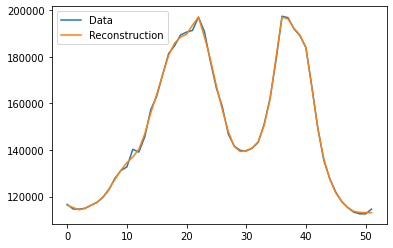

In [13]:
x_hat_Gaussian = np.matmul(D_Gaussian.T, theta_Gaussian) + bias

plt.figure()
plt.plot(data)
plt.plot(x_hat_Gaussian)

plt.legend(['Data', 'Reconstruction'])
plt.show()